In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

## Ligne Influence Effort Tranchant E
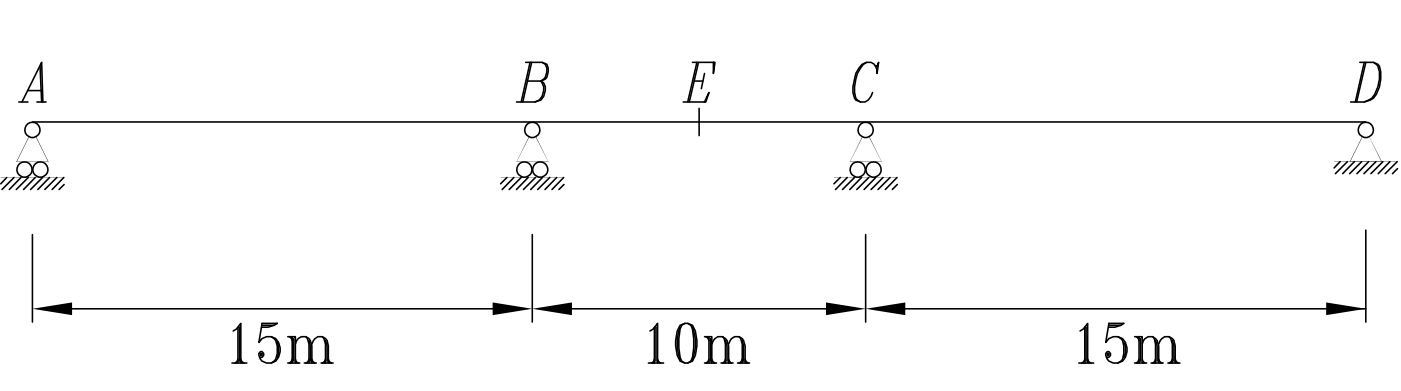

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],#Appui F
     [7, 0],#Appui F (Dupliqué)
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1


In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1


In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] = [0, 0, 39, 0, 1, 40]
LM[:,1] = [0, 1, 40, 0, 2, 41]    
LM[:,2] = [0, 2, 41, 0, 3, 42]   
LM[:,3] = [0, 3, 42, 0, 4, 43]
LM[:,4] = [0, 4, 43, 0, 5, 44]   
LM[:,5] = [0, 5, 44, 0, 6, 45]
LM[:,6] = [0, 6, 45, 0, 7, 46]
#Les degré de liberté en déplacement sont différents
LM[:,7] =  [0, 8,  46, 0, 9, 47]
LM[:,8] =  [0, 9,  47, 0, 10, 48]
LM[:,9] =  [0, 10, 48, 0, 11, 49]
LM[:,10] = [0, 11, 49, 0, 12, 50]
LM[:,11] = [0, 12, 50, 0, 13, 51]
LM[:,12] = [0, 13, 51, 0, 14, 52]
LM[:,13] = [0, 14, 52, 0, 15, 53]
LM[:,14] = [0, 15, 53, 0, 0, 54]

#Travée 2
LM[:,15] = [0, 0,  54, 0, 16, 55]
LM[:,16] = [0, 16, 55, 0, 17, 56]
LM[:,17] = [0, 17, 56, 0, 18, 57]
LM[:,18] = [0, 18, 57, 0, 19, 58]
LM[:,19] = [0, 19, 58, 0, 20, 59]
LM[:,20] = [0, 20, 59, 0, 21, 60]
LM[:,21] = [0, 21, 60, 0, 22, 61]
LM[:,22] = [0, 22, 61, 0, 23, 62]
LM[:,23] = [0, 23, 62, 0, 24, 63]
LM[:,24] = [0, 24, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 25, 65]
LM[:,26] = [0, 25,65, 0, 26, 66]
LM[:,27] = [0, 26,66, 0, 27, 67]
LM[:,28] = [0, 27,67, 0, 28, 68]
LM[:,29] = [0, 28,68, 0, 29, 69]
LM[:,30] = [0, 29,69, 0, 30, 70]
LM[:,31] = [0, 30,70, 0, 31, 71]
LM[:,32] = [0, 31,71, 0, 32, 72]
LM[:,33] = [0, 32,72, 0, 33, 73]
LM[:,34] = [0, 33,73, 0, 34, 74]
LM[:,35] = [0, 34,74, 0, 35, 75]
LM[:,36] = [0, 35,75, 0, 36, 76]
LM[:,37] = [0, 36,76, 0, 37, 77]
LM[:,38] = [0, 37,77, 0, 38, 78]
LM[:,39] = [0, 38,78, 0, 0,  79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15  0 16 17 18 19 20 21 22 23
  24  0 25 26 27 28 29 30 31 32 33 34 35 36 37 38  0]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15  0 16 17 18 19 20 21 22 23 24
   0 25 26 27 28 29 30 31 32 33 34 35 36 37 38  0  0]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
  64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79  0]]


In [8]:
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(40):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[ 17.333334  ,  33.833332  ,  49.333332  , ...,   0.47333333,
          0.49333334,   0.5       ],
       [ 33.833332  ,  66.666664  ,  97.666664  , ...,   0.94666666,
          0.9866667 ,   1.        ],
       [ 49.333332  ,  97.666664  , 144.        , ...,   1.42      ,
          1.48      ,   1.5       ],
       ...,
       [  0.47333333,   0.94666666,   1.42      , ...,   2.5945334 ,
          2.4661334 ,   2.4233334 ],
       [  0.49333334,   0.9866667 ,   1.48      , ...,   2.4661334 ,
          3.3365333 ,   3.2933333 ],
       [  0.5       ,   1.        ,   1.5       , ...,   2.4233334 ,
          3.2933333 ,   4.25      ]], dtype=float32)

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[5] = -1
P_global[6] = 1
print(P_global)

[ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U)

[ 1.15000000e+01  2.30000000e+01  3.45000000e+01  4.60000000e+01
  5.75000000e+01  6.90000000e+01  8.03333333e+01 -5.60000000e+01
 -4.55000000e+01 -3.60000000e+01 -2.75000000e+01 -2.00000000e+01
 -1.35000000e+01 -8.00000000e+00 -3.50000000e+00  2.52000000e+00
  4.16000000e+00  5.04000000e+00  5.28000000e+00  5.00000000e+00
  4.32000000e+00  3.36000000e+00  2.24000000e+00  1.08000000e+00
 -9.02222222e-01 -1.61777778e+00 -2.16000000e+00 -2.54222222e+00
 -2.77777778e+00 -2.88000000e+00 -2.86222222e+00 -2.73777778e+00
 -2.52000000e+00 -2.22222222e+00 -1.85777778e+00 -1.44000000e+00
 -9.82222222e-01 -4.97777778e-01  1.15000000e+01  1.15000000e+01
  1.15000000e+01  1.15000000e+01  1.15000000e+01  1.15000000e+01
  1.15000000e+01  1.10000000e+01  1.00000000e+01  9.00000000e+00
  8.00000000e+00  7.00000000e+00  6.00000000e+00  5.00000000e+00
  4.00000000e+00  3.00000000e+00  2.06000000e+00  1.24000000e+00
  5.40000000e-01 -4.00000000e-02 -5.00000000e-01 -8.40000000e-01
 -1.06000000e+00 -1.16000

In [11]:
# Line d'Influence Muller-Breslaut
V1 = U[5]
V2 = U[6]


LI  = U/(abs(V1) + abs(V2)) #changer le signe de V2 pour une somme en valeur absolue
print(LI)


[ 7.70089286e-02  1.54017857e-01  2.31026786e-01  3.08035714e-01
  3.85044643e-01  4.62053571e-01  5.37946429e-01 -3.75000000e-01
 -3.04687500e-01 -2.41071429e-01 -1.84151786e-01 -1.33928571e-01
 -9.04017857e-02 -5.35714286e-02 -2.34375000e-02  1.68750000e-02
  2.78571429e-02  3.37500000e-02  3.53571429e-02  3.34821429e-02
  2.89285714e-02  2.25000000e-02  1.50000000e-02  7.23214286e-03
 -6.04166667e-03 -1.08333333e-02 -1.44642857e-02 -1.70238095e-02
 -1.86011905e-02 -1.92857143e-02 -1.91666667e-02 -1.83333333e-02
 -1.68750000e-02 -1.48809524e-02 -1.24404762e-02 -9.64285714e-03
 -6.57738095e-03 -3.33333333e-03  7.70089286e-02  7.70089286e-02
  7.70089286e-02  7.70089286e-02  7.70089286e-02  7.70089286e-02
  7.70089286e-02  7.36607143e-02  6.69642857e-02  6.02678571e-02
  5.35714286e-02  4.68750000e-02  4.01785714e-02  3.34821429e-02
  2.67857143e-02  2.00892857e-02  1.37946429e-02  8.30357143e-03
  3.61607143e-03 -2.67857143e-04 -3.34821429e-03 -5.62500000e-03
 -7.09821429e-03 -7.76785

Ordonnée de la Ligne d'Influence : 
 [ 0.          0.07700893  0.15401786  0.23102679  0.30803571  0.38504464
  0.46205357  0.53794643 -0.375      -0.3046875  -0.24107143 -0.18415179
 -0.13392857 -0.09040179 -0.05357143 -0.0234375   0.          0.016875
  0.02785714  0.03375     0.03535714  0.03348214  0.02892857  0.0225
  0.015       0.00723214  0.         -0.00604167 -0.01083333 -0.01446429
 -0.01702381 -0.01860119 -0.01928571 -0.01916667 -0.01833333 -0.016875
 -0.01488095 -0.01244048 -0.00964286 -0.00657738 -0.00333333  0.        ]


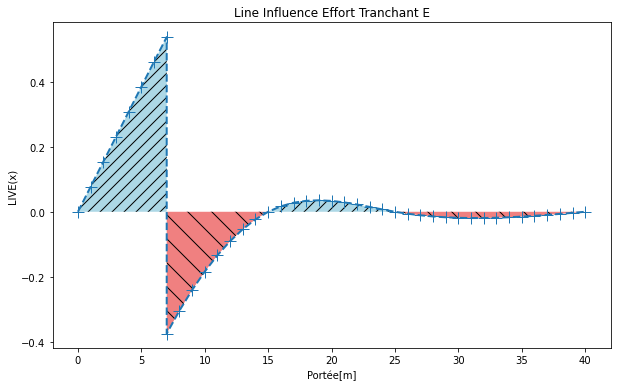

In [23]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]

y = np.zeros((42,))
# Noeud 0
y[0]   = 0
# Noeud 1, 2
y[1:16] = LI[0:15] #(0, 1)
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[16]   = 0 
# Noeud 4,5 : Point E
y[17:26] = LI[15:24] #(2, 3)
y[26] = 0
# # Noeud 5, 6
y[27:41] = LI[24:38] #(4, 5)
# # Noeud 7 reaction appui 0
y[41] = 0

print("Ordonnée de la Ligne d'Influence : \n",y)

plt.figure(figsize=(10,6))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIVE(x)")
plt.title("Line Influence Effort Tranchant E")

# Show the plot
plt.show()